# Neural network from scratch

## Data preparation

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train = pd.read_csv("mnist_train.csv")
train = np.array(train)
train_labels = train[:,0]
train = train / 255.0
train = train[:,1:].T
test = pd.read_csv("mnist_test.csv")
test = np.array(test)
test_labels = test[:,0]
test = test[:,1:].T
test = test / 255.0
n, m = train.shape
print(n, m)

784 60000


## Specification
Our neural network will have 3 layers:
- an input layer
- a hidden layer with 10 neurons (activation function: RELU)
- an output layer (activation function: SOFTMAX)

In [72]:
def init_params():
    weights_1 = np.random.rand(10, n) - 0.5
    bias_1 = np.random.rand(10, 1) - 0.5
    weights_2 = np.random.rand(10, 10) - 0.5
    bias_2 = np.random.rand(10, 1) - 0.5
    return weights_1, bias_1, weights_2, bias_2

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def forward_propagation(data, weights_1, bias_1, weights_2, bias_2):
    z_1 = weights_1.dot(data) + bias_1
    a_1 = relu(z_1)
    z_2 = weights_2.dot(a_1) + bias_2
    a_2 = softmax(z_2)
    return z_1, a_1, z_2, a_2 

def one_hot(labels):
    one_hot_labels = np.zeros((10, labels.size))
    for i in range(labels.size):
        one_hot_labels[labels[i], i] = 1
    return one_hot_labels

def derivative_relu(x):
    return x > 0

def back_propagation(z_1, a_1, z_2, a_2, weights_1, weights_2, labels, data):
    one_hot_labels = one_hot(labels)
    dz_2 = a_2 - one_hot_labels 
    dw_2 = (1/m) * np.dot(dz_2, a_1.T)
    db_2 = (1/m) * np.sum(dz_2)
    dz_1 = np.dot(weights_2, dz_2) * derivative_relu(z_1) 
    dw_1 = (1/m) * np.dot(dz_1, data.T)
    db_1 = (1/m) * np.sum(dz_1)
    return dw_1, db_1, dw_2, db_2

def update_params(weights_1, bias_1, weights_2, bias_2):
    z_1, a_1, z_2, a_2 = forward_propagation(train, weights_1, bias_1, weights_2, bias_2)
    dw_1, db_1, dw_2, db_2 = back_propagation(z_1, a_1, z_2, a_2, weights_1, weights_2, train_labels, train)
    weights_1 -= 0.10 * dw_1
    bias_1 -= 0.10 * db_1
    weights_2 -= 0.10 * dw_2
    bias_2 -= 0.10 * db_2
    return weights_1, bias_1, weights_2, bias_2


## Train

In [73]:
def accuracy(data, labels, weights_1, bias_1, weights_2, bias_2):
    _, _, _, a_2 = forward_propagation(data, weights_1, bias_1, weights_2, bias_2)
    predictions = np.argmax(a_2, axis=0)
    return np.sum(predictions == labels) / labels.size

def gradient_descent():
    best_acc = 0
    best_n = 0
    weights_1, bias_1, weights_2, bias_2 = init_params()
    best_weights1, best_bias1, best_weights2, best_bias2 = weights_1, bias_1, weights_2, bias_2
    for i in range(1000):
        weights_1, bias_1, weights_2, bias_2 = update_params(weights_1, bias_1, weights_2, bias_2)
        acc = accuracy(test, test_labels, weights_1, bias_1, weights_2, bias_2)
        if acc > best_acc:
            best_acc = acc
            best_n = i
            best_weights1, best_bias1, best_weights2, best_bias2 = weights_1, bias_1, weights_2, bias_2
        elif i - best_n > 20:
            break
        if i % 10 == 0:
            print("Train accuracy: ", accuracy(test, test_labels, weights_1, bias_1, weights_2, bias_2))
    return best_weights1, best_bias1, best_weights2, best_bias2

w1, b1, w2, b2 = gradient_descent()

Train accuracy:  0.0933
Train accuracy:  0.1736
Train accuracy:  0.2639
Train accuracy:  0.3084
Train accuracy:  0.3683
Train accuracy:  0.4244
Train accuracy:  0.4777
Train accuracy:  0.529
Train accuracy:  0.5781
Train accuracy:  0.6198
Train accuracy:  0.6525
Train accuracy:  0.6756
Train accuracy:  0.6977
Train accuracy:  0.7149
Train accuracy:  0.7283
Train accuracy:  0.7409
Train accuracy:  0.7506
Train accuracy:  0.7592
Train accuracy:  0.7684
Train accuracy:  0.7738
Train accuracy:  0.7784
Train accuracy:  0.7837
Train accuracy:  0.7888
Train accuracy:  0.794
Train accuracy:  0.7985
Train accuracy:  0.8038
Train accuracy:  0.807
Train accuracy:  0.81
Train accuracy:  0.8137
Train accuracy:  0.818
Train accuracy:  0.8212
Train accuracy:  0.8239
Train accuracy:  0.8273
Train accuracy:  0.829
Train accuracy:  0.8316
Train accuracy:  0.8342
Train accuracy:  0.8364
Train accuracy:  0.8391
Train accuracy:  0.8412
Train accuracy:  0.8432
Train accuracy:  0.844
Train accuracy:  0.8451


## Results

Prediction:  9


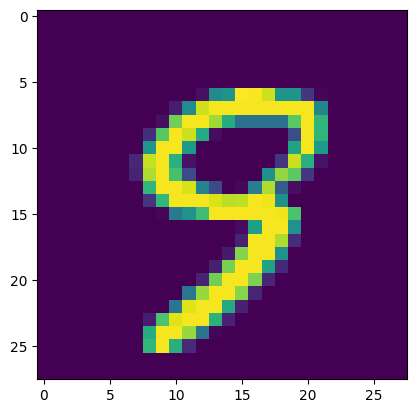

Prediction:  3


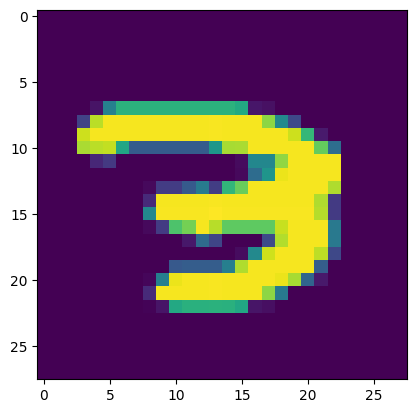

Prediction:  3


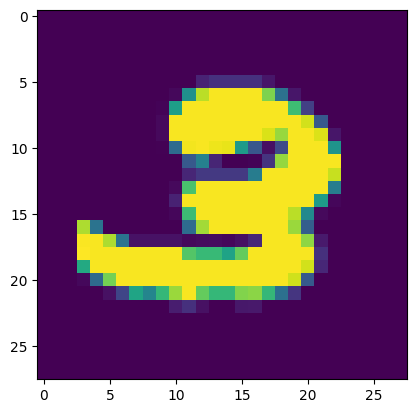

Prediction:  6


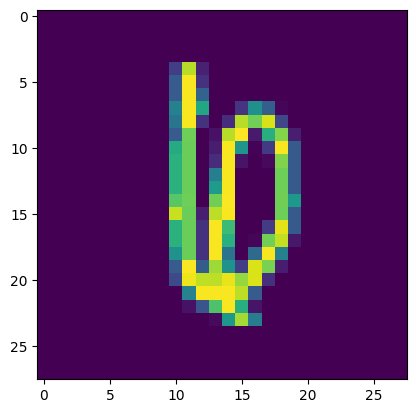

Prediction:  6


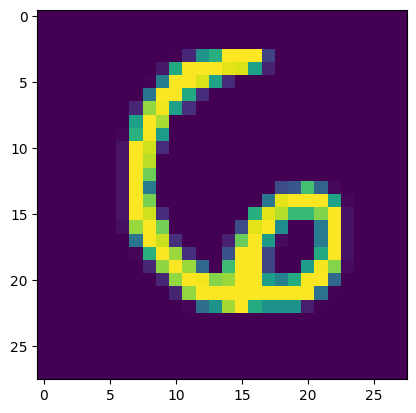

Prediction:  4


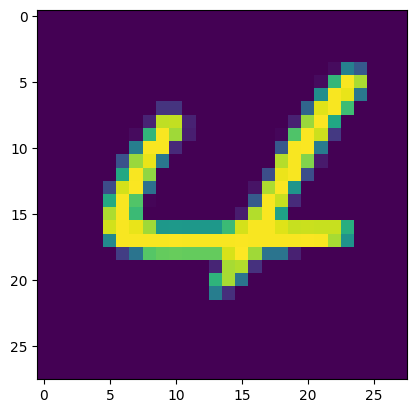

Prediction:  4


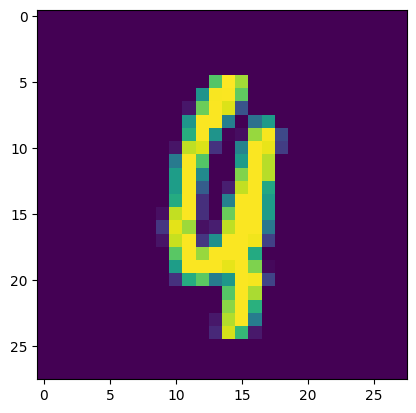

Prediction:  8


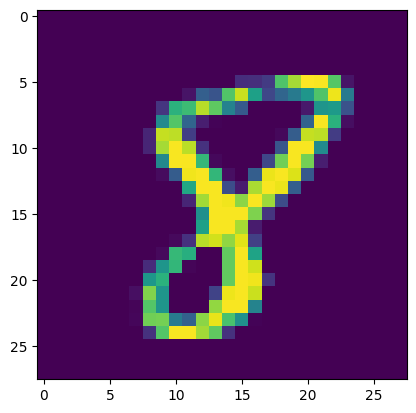

Prediction:  9


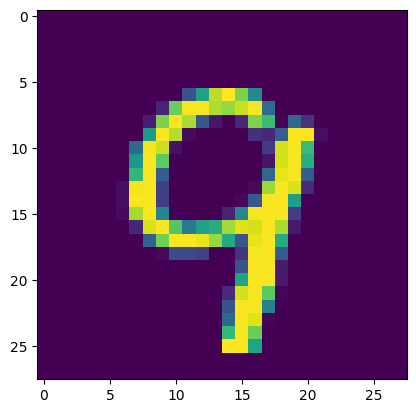

Prediction:  2


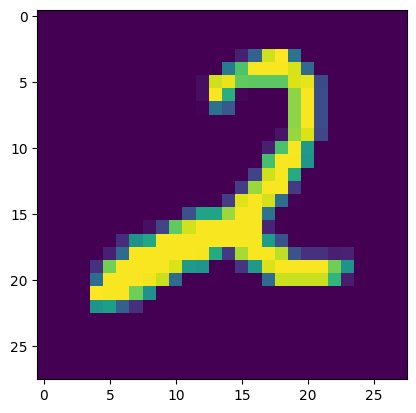

In [78]:
import random


def plot_predictions(data, weights_1, bias_1, weights_2, bias_2):
    _, _, _, a_2 = forward_propagation(data, weights_1, bias_1, weights_2, bias_2)
    predictions = np.argmax(a_2, axis=0)
    for i in range(10):
        print("Prediction: ", predictions[i])
        plt.imshow(data[:,i].reshape(28,28), interpolation='nearest')
        plt.show()

numbers = random.sample(range(0,test.shape[1]), 10)
test_numbers = [] 
for i in numbers:
    test_numbers.append(test[:,i])

plot_predictions(np.array(test_numbers).T, w1, b1, w2, b2)